<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/CNN%EA%B3%BC_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

print(len(X_train))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
60000


In [ ]:
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(X_train.shape) # 데이터셋 개수 , row size, col size
print(y_train.shape) # 데이터셋 개수 60000개 -> 정답은 그림이 아니라 숫자로 있다.
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784)
#X_train = X_train.astype('float64')
X_train = X_train / 255 # 최대값이 1.0이 될 것.

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
# multiclassification이므로, y 값을 원 핫 인코딩을 해준다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_train.shape # 데이터셋 개수 60000개 -> 정답은 그림이 아니라 숫자로 있다.

(60000,)

# 0~9 까지의 손글씨를 분류하는 모델을 만들어보자!

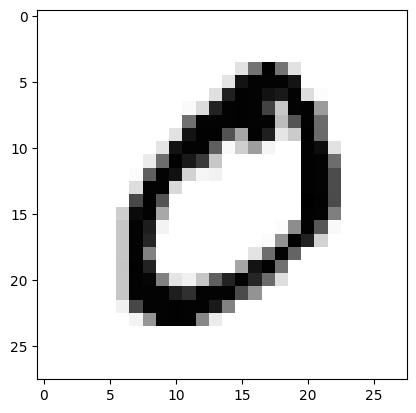

(60000, 28, 28)


In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[1], cmap='Greys')
plt.show()
print(X_train.shape)

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.  => 숫자가 높을수록 어두워짐
for x in X_train[1]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n') #\ left at back space

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  51 15925315950 0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  48 2382522522522370  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  54 22725325223923325257 6  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  10 60 22425225325220284 2522531220  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  16325225225225325225296 1892531670  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  51 23825325319011425322847 79 2551680  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  48 23825225217912 75 12121 0  0  25324350 0  0  0  0  0  
0  0  0  0  0  0  0  0  38 16525323320884 0  0  0  0  0  0  25325

In [ ]:
X_train.reshape()

NameError: name 'X_train' is not defined

class 5는 5만 1이다.

In [ ]:
y_train.shape # 데이터 개수, 리스트 길이

(60000, 10)

## 2. 딥러닝 기본 프레임 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()




In [ ]:
print(X_train.shape) # 데이터셋 개수 , row size, col size
print(y_train.shape) # 데이터셋 개수 60000개 -> 정답은 그림이 아니라 숫자로 있다.
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다. One-Hot Encording
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
print(X_train.shape) # 데이터셋 개수 , row size, col size
print(y_train.shape) # 데이터셋 개수 60000개 -> 정답은 그림이 아니라 숫자로 있다.
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:

# 모델 구조를 설정합니다. 은닉층 - 1개/input 784개 /은닉층 노드 수 784 개 / output 10개   , 출력층 활성화함수 multiclassification이므로 softmax
# X_train의 row size x col size = 784
# 원핫인코딩 y_train의 배열 크기 10
# color image이면 input_dim에 x3을 해주어야 한다,

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # softmax와 set인 loss function : categorical_cross entropy



In [ ]:
# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5" #모델 저장지점
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
"""
filepath : 저장위치
monitor : validation_loss 기준으로 저장
verbose : 몇번마다 확인할건지
svae_best_only = True : validation loss가 이전보다 낮아지는 경우만 저장함 / false로 하면 epoch한 번 마다 저장한다.

"""



early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

"""
batch_size : 몇 번씩 끊어서 학습 할건지
callbacks : 배열형태로 정리되는 변수ㅡ enrly_stopping_callback : 위에 설정한 early_stopping_callback 에 따라 10번 학습동안 변함없으면 멈추라는 뜻

"""

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.19480, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.19480 to 0.13458, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13458 to 0.11794, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11794 to 0.10366, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10366 to 0.09931, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09931 to 0.08766, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08766

Epoch 8: val_loss improved from 0.08766 to 0.08688, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08688 to 0.08041, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08041

Epoch 11: val_loss did not improve from 0.08041

Epoch 12: val_loss did not improve from 0.08041

Epoch 13: val_loss did not improve from 0.08041

Epoch 14: val_loss did not improve from 0.08041

Epoch 15: val_loss did not improve from 0.08041

Epoch 16: val_loss did not improve from 0.08041

Epoch 

val_loss가 10번동안 개선이 안되면 종료


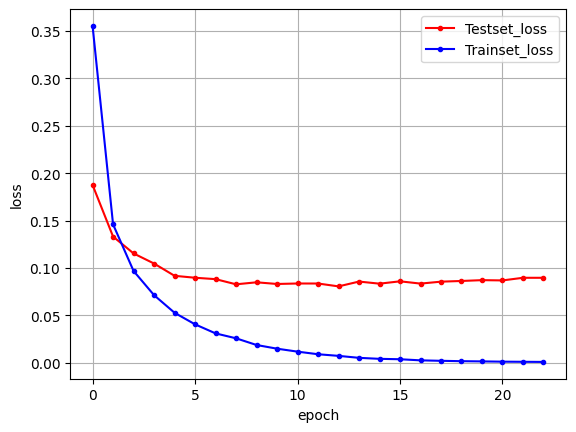

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

####  이미지 처리에서 일반적인 신경망 사용으로, trainset과 testset에서 각 오차를 나타낸 그래프이다. 우리의 목표는 훈련과 테스트셋에서 오차를 다 0에 수렴하게 만들고 싶다. 그럼 적합하지 않다.

## 5. 컨볼루션 신경망 실행하기

###  이미지 데이터에 cnn사용하면 train,test에서 오차가 0에 수렴하게 만들 수 있다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:


# 컨볼루션 신경망의 설정
model = Sequential()

# conv & pooling
"""
  kernel size : 3x3 - 특징의 개수는 커널의 개수와 같다. 32개 커널 사용 32개의 특징을 뽑겠다는 뜻
  input : train의 사이즈 28x28 그리고 channel은 흑백이므로 1
  stride =3 과 같이 추가 설정가능
 """


model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2,2)))
# pooling size - 특징을 유지하면서 size 축소 , 연산량 감소의 의미, 2x2로 pooling 하겠다.

# dropout : overfitting 방지 / flatten : 평탄화
model.add(Dropout(0.25)) # 1/4 비율로 dropout 가중치가 적은 뉴런 끊어서 오버피팅 방지하겠다.
model.add(Flatten()) #피쳐 맵을 1자로

# 평탄화 한 데이터를 dense하게 신경망에 넣음
model.add(Dense(128,  activation='relu'))

# 다시 오버피팅 방지
model.add(Dropout(0.5))

# 출력층, 다층 분류이므로 softmax
model.add(Dense(10, activation='softmax'))




In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                      

In [ ]:

# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=30, batch_size=200,
                    verbose=0, callbacks=[early_stopping_callback,
                                          checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08123, saving model to ./MNIST_CNN.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08123 to 0.05801, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05801 to 0.05263, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05263 to 0.04383, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04383

Epoch 6: val_loss improved from 0.04383 to 0.04291, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04291 to 0.04048, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04048 to 0.03866, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.03866 to 0.03762, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03762

Epoch 11: val_loss did not improve from 0.03762

Epoch 12: val_loss improved from 0.03762 to 0.03749, saving model to ./MNIST_CNN.hdf5

Epoch 13: val_loss did not improve from 0.03749

Epoch 14: val_loss did not improve from 0.03749

Epoch 15: val_loss did not improve from 0.03749

Epoch 16: val_los

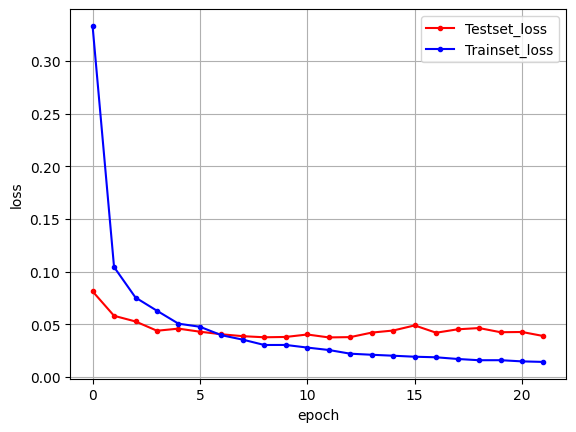

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()